## Synth Experiment 2

In this experiment we draw PR curves with synth data

1. Fixed threshold scorer
1. Lord 
1. DecayLord
1. Saffron
1. DecaySaffron
1. ADDISFilter

For the fixed threshold scorer, we'll change `threshold`, for others we'll change `fdr_target`.

**Note 1: This notebook is mainly for small scale experiments.** 

* There is also an experiment2 CLI to run multiple large experiments in the background.
* The CLI has multiple recipes for experimenting with increasingly noisy and increasingly anomolous data.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from pathlib import Path

from fdrc.filters import build_filter
from fdrc.artificial_data import make_gaussian_hypotheses
from fdrc.plots import plot_dataset, plot_result
from fdrc.experiment2 import experiment2_main, make_fdp_curve


def run_and_plot_sample(dataset, filter_name, filter_params):
    _, state = build_filter(filter_name, filter_params).step(dataset["p_values"])
    return plot_dataset(dataset, thresholds=state.threshold_history)

## Experiment Setup

In [2]:
# Results directory:
EXPERIMENT_DIR = "../results/synthetic"

# Data generation parameters (will be ignored if prev. results are loaded.)
recipe = {
    "repeat": 50,
    "data_regime": {
        "size": 1000,
        "anomaly_ratio": 0.01,
        "signal_strength": 5.0,
        "data_noise": 1.0
    }
}

datasets = [
    make_gaussian_hypotheses(**recipe["data_regime"]) for i in range(recipe["repeat"])
]
 
# Thresholds for Naive FDRC    
thresholds = list(np.logspace(-1, -5, 20))
                  
# FDR targers for LORD, SAFFRON and ADDIS (+ decay versions)
fdr_targets = list(np.linspace(0.99, 0, 20, endpoint=False))

results = []

## Fixed Threshold

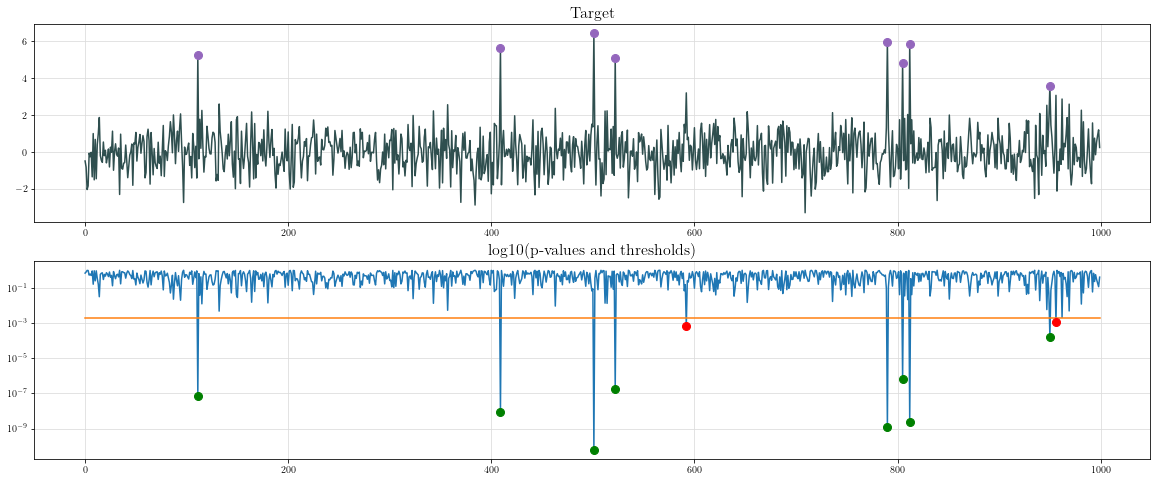

In [3]:
run_and_plot_sample(datasets[0], "FixedThresholdFilter", dict(threshold=0.002))

In [4]:
results.append(
    experiment2_main(
        filter_name="FixedThresholdFilter", 
        datasets=datasets, 
        param_name="threshold", 
        param_values=thresholds,
    )
)

FixedThresholdFilter started.
FixedThresholdFilter finished. Elapsed time: 0:00:03


## Lord Filter

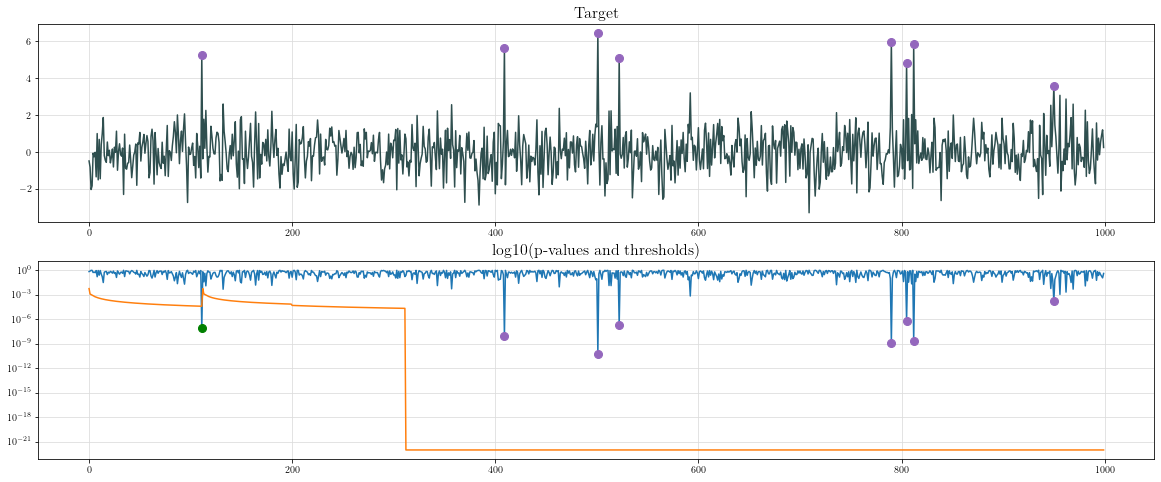

In [5]:
run_and_plot_sample(datasets[0], "LORDFilter", dict(fdr_target=0.05, gamma_size=200, delta=1.0))

In [6]:
results.append(
    experiment2_main(
        filter_name="LORDFilter",
        filter_params={
            "gamma_size": 200,
            "delta": 0.99
        },
        datasets=datasets,
        param_name="fdr_target",
        param_values=fdr_targets,
    )
)

LORDFilter started.
LORDFilter finished. Elapsed time: 0:00:33


## Decay LORD Filter

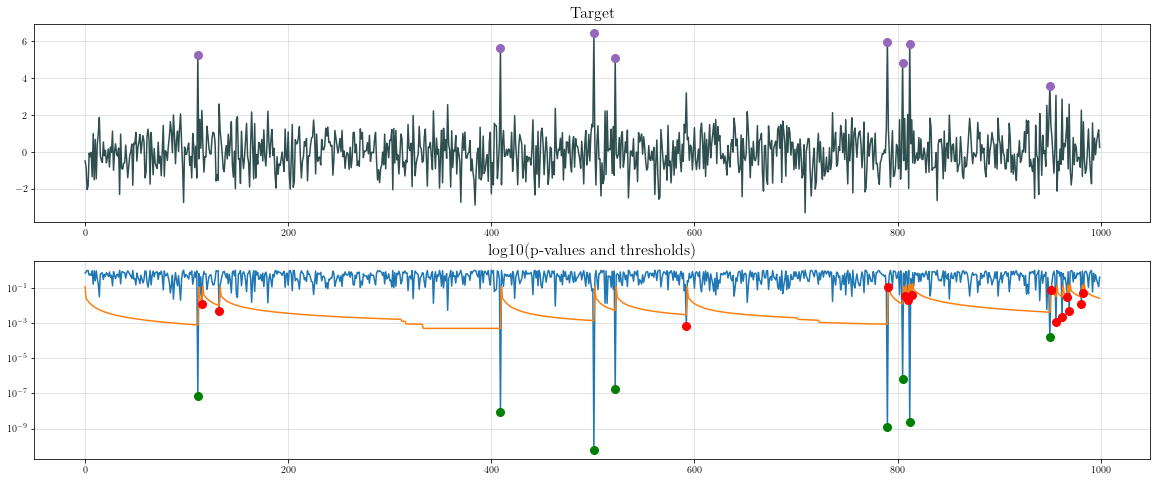

In [7]:
run_and_plot_sample(datasets[0], "DecayLORDFilter", dict(fdr_target=0.5, gamma_size=200, delta=0.999))

In [8]:
results.append(
    experiment2_main(
        filter_name="DecayLORDFilter",
        filter_params={
            "gamma_size": 200,
            "delta": 0.99
        },
        datasets=datasets,
        param_name="fdr_target",
        param_values=fdr_targets,
    )
)

DecayLORDFilter started.
DecayLORDFilter finished. Elapsed time: 0:00:36


## SAFFRON Filter

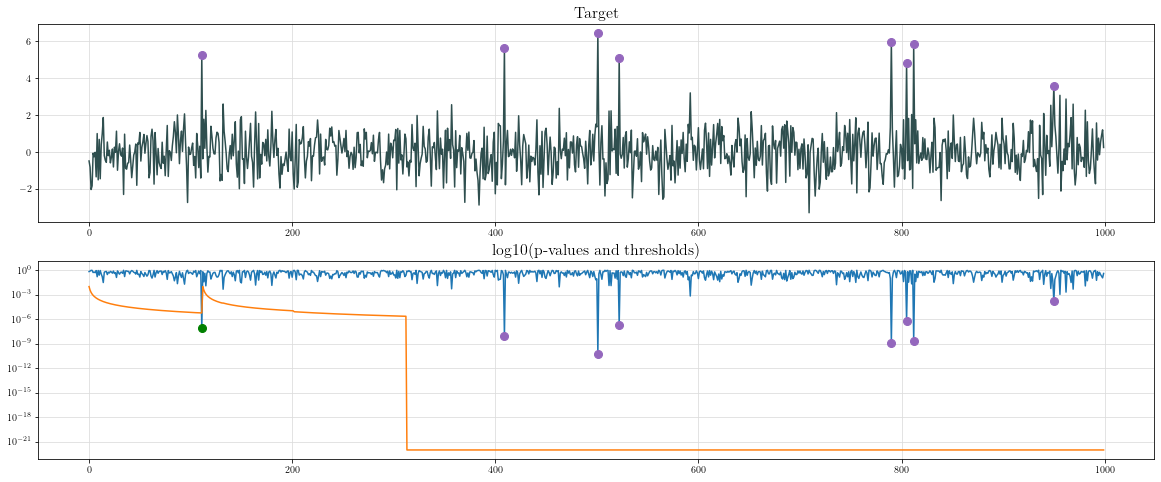

In [9]:
run_and_plot_sample(
    datasets[0],  
    "SAFFRONFilter", 
    dict(
        fdr_target=0.05, 
        candidacy_threshold=1e-2,
        gamma_size=200,
        gamma_exponent=1.6,
    )
)

In [10]:
results.append(
    experiment2_main(
        filter_name="SAFFRONFilter",
        filter_params={
            "gamma_size": 200
        },
        datasets=datasets,
        param_name="fdr_target",
        param_values=fdr_targets,
    )
)

SAFFRONFilter started.
SAFFRONFilter finished. Elapsed time: 0:00:24


## Decay SAFFRON Filter

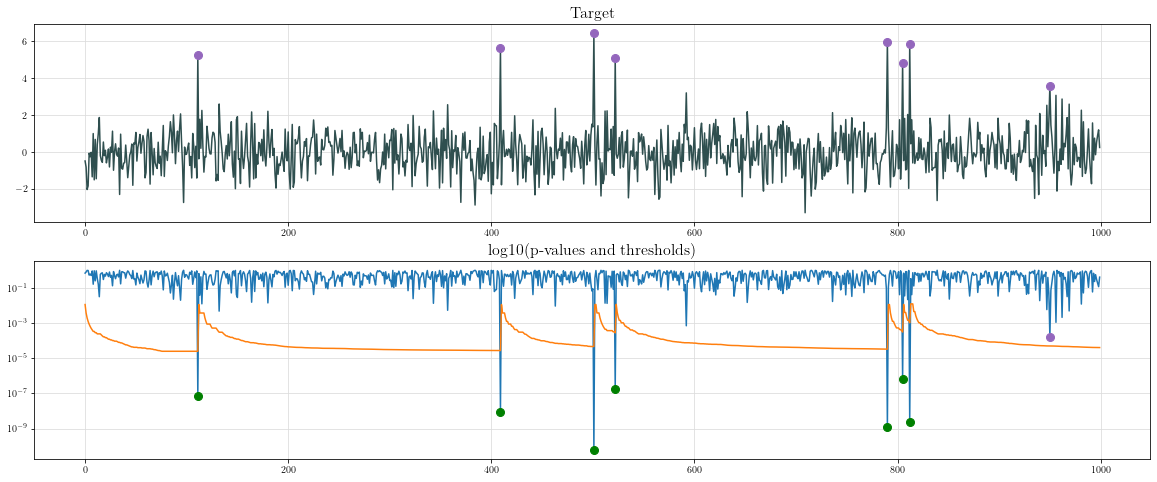

In [11]:
run_and_plot_sample(
    datasets[0], 
    "DecaySAFFRONFilter", 
    dict(
        fdr_target=0.05, 
        gamma_size=200,
        delta=0.999
    )
)

In [12]:
results.append(
    experiment2_main(
        filter_name="DecaySAFFRONFilter",
        filter_params={
            "gamma_size": 200,
            "delta": 0.99
        },
        datasets=datasets,
        param_name="fdr_target",
        param_values=fdr_targets,
    )
)

DecaySAFFRONFilter started.
DecaySAFFRONFilter finished. Elapsed time: 0:00:31


## ADDIS Filter

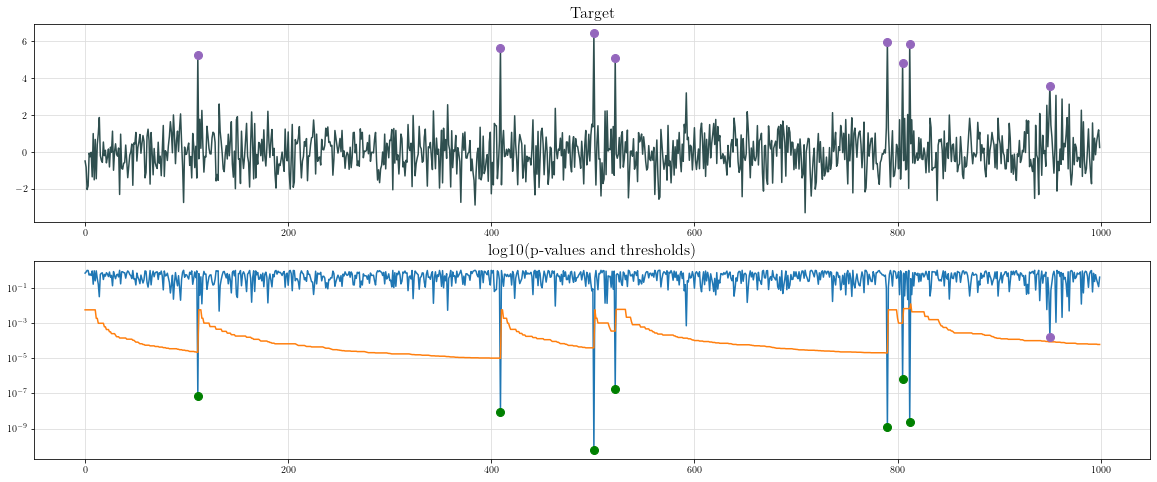

In [13]:
run_and_plot_sample(
    datasets[0], 
    "ADDISFilter",
    dict(
        fdr_target=0.05, 
        gamma_size=200
    )
)

In [14]:
results.append(
    experiment2_main(
        filter_name="ADDISFilter",
        filter_params={
            "gamma_size": 200,
            "delta": 0.99
        },
        datasets=datasets,
        param_name="fdr_target",
        param_values=fdr_targets,
    )
)

ADDISFilter started.
ADDISFilter finished. Elapsed time: 0:00:24


## Plot PR Curve

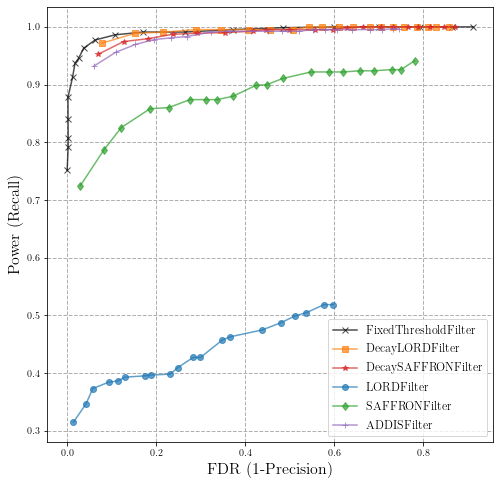

In [15]:
make_fdp_curve(results)